## Behavioral analyses for chipmunk

### Import modules

In [1]:
from os import path, makedirs
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import numpy as np
import sys
from utils import * #chiCa functions

### Convert .mat files

In [ ]:
converted_files = convert_specified_behavior_sessions(file_names, overwrite=False)

### Get file names

In [2]:
file_names = pick_files_multi_session("chipmunk", "*.h5")

### Pre-processing

In [ ]:
# Separate sessions with bad labcams logfiles
earlyGRBsessions = ['20230126_110314',
                     '20230127_114504',
                     '20230130_121533',
                     '20230131_113044',
                     '20230201_131437',
                     '20230201_131715',
                     '20230202_123237',
                     '20230202_123648',
                     '20230203_133526',
                     '20230207_153632',
                     '20230208_113843',
                     '20230209_115759',
                     '20230210_132751',
                     '20230213_132401',
                     '20230217_132430',
                     '20230221_112843']

camlog_file_names = pick_files_multi_session("chipmunk", "*.camlog", "BackStereo") #should rename this to camlog file names

# Align data
for camlog_file in camlog_file_names:
    if str.split(camlog_file, '/')[5] in earlyGRBsessions:
        t = str.split(camlog_file, '/')[5]
        print('------------------------------')
        print(f'Using early sessions alignment function for {t}.')
        try:
            align_behavioral_video_earlyGRBsessions(camlog_file)
        except:
            print("There was an issue with the camlog file for the current early session:", camlog_file)
            print("Continuing to the next one...")
            continue
    else:
        t = str.split(camlog_file, '/')[5]
        print('------------------------------')
        print(f'Using default alignment function for {t}.')
        try:
            align_behavioral_video(camlog_file)
        except:
            print("There was an issue with the camlog file for the current session:", camlog_file)
            print("Continuing to the next one...")
            continue

# Get aligned data file paths into a list
print('------------------------------')
print('Proceeding with video alignment')
sessions = []
for file in camlog_file_names:
    sessions.append(str.split(file, '/')[5]) # could vary by operating systems

aligned_data_paths = []
count = 0
for file in camlog_file_names:
    analysis_folder = path.join(path.join(*str.split(file, '/')[0:6], 'analysis/')) .replace('home', '/home')
    if path.exists(analysis_folder):
        # get aligned data
        aligned_file = glob(analysis_folder + '*_video_alignment.npy')
        aligned_data_paths.append(aligned_file[0])
        print(f'Aligned data for session {sessions[count]} added to aligned_data_paths list.')
        print('------------------------------')
        count+=1
    else:
        print(f'No video aligned trial data found for {sessions[count]}')
        print('------------------------------')
        count+=1

### Load trial data

In [9]:
# Load trial data 
trialdata = [pd.read_hdf(glob(path.split(file)[0] + "/*.h5")[0]) for file in file_names]
animalID = trialdata[0]['demonstrator_ID'][0]

In [6]:
trialdata[-1]

,outcome_record,Port1In,Port1Out,Port2In,Port2Out,Port3In,Port3Out,Tup,DemonCenterFixationPeriod,DemonDidNotChoose,...,preStimDelay,waitTime,postStimDelay,interTrialInterval,virtualObsInitDelay,ExtraStimulusDuration,actual_wait_time,demonstrator_ID,outcome_presentation,revise_choice_flag
0,0,[8.8928],[9.0238],"[7.8768, 10.443299999999999]","[8.1395, 10.541]",[nan],[nan],"[0.1, 0.1001, 7.8769, 7.877, 7.8771, 8.0171999...","[7.8771, 8.017199999999999]","[nan, nan]",...,0,0.1401,0,0,0,0,0.2627,GRB001,"[8.8928, 8.8928]",0
1,-1,[nan],[nan],[0.5905],[0.7168],[nan],[nan],"[0.1, 0.1001, 0.5906, 0.5907, 0.5908, 0.7169, ...","[0.5908, 0.7168]","[nan, nan]",...,0,0.1404,0,0,0,0,0.1263,GRB001,[nan],0
2,1,[29.612299999999998],[29.691200000000002],"[37.3152, 37.7479]","[37.5585, 37.8681]",[38.327],[nan],"[0.1, 0.1001, 37.3153, 37.315400000000004, 37....","[37.3155, 37.4559]","[nan, nan]",...,0,0.1404,0,0,0,0,0.2433,GRB001,"[38.327, 38.327]",0
3,0,[12.4203],[12.601700000000001],[11.6586],[11.9834],[nan],[0.9623999999999999],"[0.1, 0.1001, 11.658700000000001, 11.6588, 11....","[11.6589, 11.7996]","[nan, nan]",...,0,0.1407,0,0,0,0,0.3248,GRB001,"[12.4203, 12.4203]",0
4,-1,[nan],[nan],"[66.1675, 66.50410000000001, 67.06389999999999...","[66.2999, 67.0077, 67.4761, 67.6819, 67.965600...",[nan],[nan],"[0.1, 0.1001, 66.16760000000001, 66.1677, 66.1...","[66.1678, 66.2999]","[nan, nan]",...,0,0.1410,0,0,0,0,0.1324,GRB001,[nan],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-1,[nan],[nan],[16.865299999999998],[16.998099999999997],[nan],[nan],"[0.1, 0.1001, 16.8654, 16.8655, 16.86559999999...","[16.865599999999997, 16.998099999999997]","[nan, nan]",...,0,0.1779,0,0,0,0,0.1328,GRB001,[nan],0
185,1,[nan],[nan],[3.2165],[3.6094],[6.2382],[nan],"[0.1, 0.1001, 3.2166, 3.2167, 3.2168, 3.3947, ...","[3.2168, 3.3947]","[nan, nan]",...,0,0.1779,0,0,0,0,0.3929,GRB001,"[6.2382, 6.2382]",0
186,-1,[3.5781],[3.7248],"[5.1027, 6.9002]","[5.1763, 7.0027]",[nan],[0.2596],"[0.1, 0.1001, 5.1028, 5.1029, 5.103, 5.1763999...","[5.103, 5.1763]","[nan, nan]",...,0,0.1782,0,0,0,0,0.0736,GRB001,[nan],0
187,2,[nan],[nan],[1.0564],[1.3545],[nan],[nan],"[0.1, 0.1001, 1.0565, 1.0566, 1.0567, 1.2349, ...","[1.0567, 1.2349]","[31.3545, 31.354599999999998]",...,0,0.1782,0,0,0,0,0.2981,GRB001,[nan],0


### Calculate wait times

In [4]:
# Get wait times
wait_times = [np.array(session['waitTime']) for session in trialdata]
actual_wait_times = [np.array(session['actual_wait_time']) for session in trialdata]

wait_time_diff = []
for array1, array2 in zip(wait_times, actual_wait_times):
    wait_time_diff.append(array2-array1)

### Plot data

In [11]:
#actual_wait_times[arr]
weights = np.ones(len(actual_wait_times[arr])) / len(actual_wait_times[arr])
weights

array([0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529

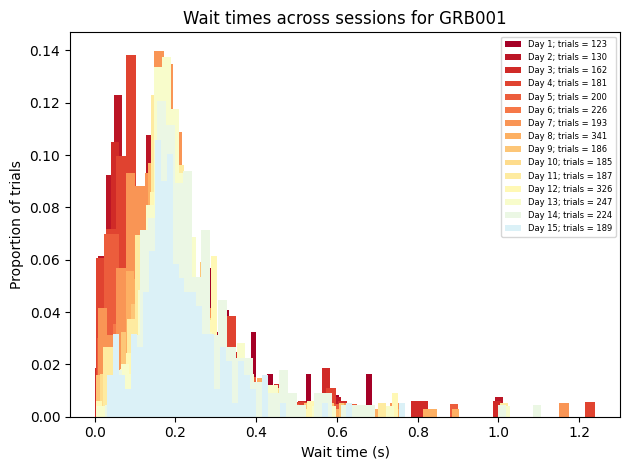

In [15]:
# Define a list of colors that follows a gradient from red to blue based on the number of days
colors = plt.colormaps['RdYlBu'].resampled(len(wait_time_diff))

# Set up the plot
fig, ax = plt.subplots()

# Iterate over the data and plot each histogram separately, assigning a color based on the day
for i, arr in enumerate(filter(lambda x: wait_times[x][0] != 0, range(len(wait_times)))):
    color = colors(i)
    ax.hist(actual_wait_times[arr], weights=np.ones(len(actual_wait_times[arr])) / len(actual_wait_times[arr]),
            bins=50, alpha=1, color=color, label=f"Day {i+1}; trials = {len(actual_wait_times[arr])}")

# Add figure details
ax.legend(fontsize=6)
ax.set_xlabel('Wait time (s)')
#ax.text(0.5, -0.19, '(observed wait time-required wait time)', transform=ax.transAxes, ha='center', fontsize=8)
ax.set_ylabel('Proportion of trials')
ax.set_title(f'Wait times across sessions for {animalID}')

# Create a ScalarMappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap=colors)
sm.set_array(range(len(actual_wait_times)))

fig.tight_layout()

### Save figures

In [16]:
#figures_dir = '/home/gabriel/figures-code/chipmunk_behavior/figures/' #for linux
figures_dir = '/Users/gabriel/figures-code/chipmunk_behavior/figures/' #for mac
fig.savefig(f'{figures_dir}{animalID}_actual_wait_times.pdf', dpi=300)